In [1]:
#Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

In [2]:
pymaceuticals_df = pd.merge(mouse_metadata, study_results, how = "left", on =["Mouse ID","Mouse ID"])
pymaceuticals_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [3]:
#Number of Mice
num_mice = pymaceuticals_df["Mouse ID"].unique()
mice_count = len(num_mice)
mice_count

249

In [4]:
duplic_mice = pymaceuticals_df[pymaceuticals_df.duplicated(["Mouse ID", "Timepoint"])]
duplic_mice

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
Pymaceuticals_df2 = pymaceuticals_df.drop_duplicates(["Mouse ID", "Timepoint"])
Pymaceuticals_df2

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [6]:
Pymaceuticals_df3 = Pymaceuticals_df2["Mouse ID"].unique()
mice_count2 = len(Pymaceuticals_df3)
mice_count2

249

In [7]:
summary_statistics_df = Pymaceuticals_df2.groupby(["Drug Regimen"])
mean = summary_statistics_df["Tumor Volume (mm3)"].mean()
# mean
median =summary_statistics_df["Tumor Volume (mm3)"].median()
# median
variance = summary_statistics_df["Tumor Volume (mm3)"].var()
# variance
standard_dev = summary_statistics_df["Tumor Volume (mm3)"].std()
# standard_dev
standard_error = summary_statistics_df["Tumor Volume (mm3)"].sem()
# standard_error

In [8]:
Summary_Statistics1 = pd.DataFrame({
    "Mean": mean,
    "Median": median,
    "Variance": variance,
    "Standard Deviation": standard_dev,
    "SEM": standard_error,
})
Summary_Statistics1

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [9]:
Summary_Statistics2 =summary_statistics_df.agg(["mean","median","var","std","sem"])["Tumor Volume (mm3)"]
Summary_Statistics2

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [10]:
Summary_Statistics2.rename(columns = {"mean" : "Mean", "median": "Median", "var" : "Variance", "std" : "Standard Deviation", "sem" : "SEM"}, inplace = True)
Summary_Statistics2

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [11]:
#bar and pie
timepoints1_df = summary_statistics_df["Timepoint"].count()
timepoints1_df

Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     156
Ramicane     228
Stelasyn     181
Zoniferol    182
Name: Timepoint, dtype: int64

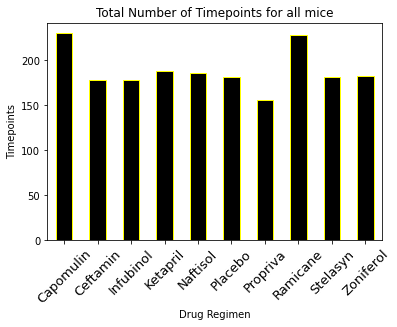

In [26]:
bar1 = timepoints1_df.plot(kind = "bar", facecolor = "black", edgecolor = "yellow",
                           title = "Total Number of Timepoints for all mice",
                           xlabel = "Drug Regimen",
                          ylabel= "Timepoints")
bar1.set_xticklabels(timepoints1_df.index, rotation=45, fontsize = 13)
plt.show()

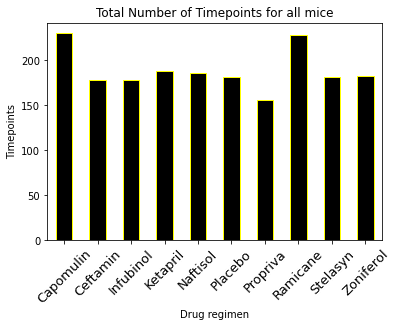

In [13]:
bar2 = summary_statistics_df["Drug Regimen"].value_counts().plot.bar(color="black", edgecolor = "yellow")
plt.title("Total Number of Timepoints for all mice")
plt.xlabel("Drug regimen")
plt.ylabel("Timepoints")
plt.xticks([0,1,2,3,4,5,6,7,8,9],["Capomulin", "Ceftamin", "Infubinol", "Ketapril", "Naftisol", "Placebo", "Propriva", "Ramicane", "Stelasyn", "Zoniferol"])
plt.xticks(fontsize=13)
plt.xticks(rotation=45)
plt.show()

In [14]:
percent_male = Pymaceuticals_df2.loc[Pymaceuticals_df2["Sex"] == "Male"]
percent_female = Pymaceuticals_df2.loc[Pymaceuticals_df2["Sex"] == "Female"]

In [15]:
percent =[len(percent_male), len(percent_female)]

In [16]:
percent1 = Pymaceuticals_df2["Sex"].value_counts()

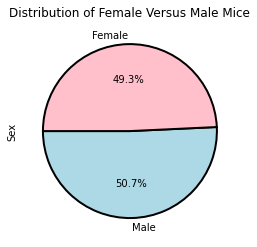

In [17]:
pie1 = percent1.plot.pie(autopct = "%1.1f%%", startangle = 180, title = "Distribution of Female Versus Male Mice", colors = ["lightblue", "pink"],
                        wedgeprops = {"edgecolor":"black", "linewidth" : 2, "antialiased": True})

Text(1.0, 1.0, 'Distribution of Female Versus Male Mice')

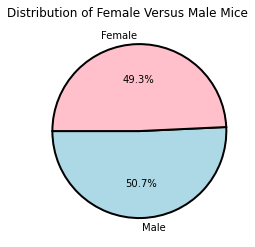

In [18]:
labels = ["Male", "Female"]
plt.pie(percent,  labels = labels, wedgeprops = {"edgecolor":"black", "linewidth" : 2, "antialiased": True}, autopct = "%1.1f%%", colors = ["lightblue", "pink"], startangle = 180)
plt.title("Distribution of Female Versus Male Mice", loc = "right", color = "black")

In [36]:
sum_stats = pd.DataFrame(Pymaceuticals_df2.groupby(["Mouse ID"])["Timepoint"].max())

In [37]:
sum_stats1 = pd.merge(Pymaceuticals_df2, sum_stats, on = "Mouse ID")
sum_stats1

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint_x,Tumor Volume (mm3),Metastatic Sites,Timepoint_y
0,k403,Ramicane,Male,21,16,0,45.000000,0,45
1,k403,Ramicane,Male,21,16,5,38.825898,0,45
2,k403,Ramicane,Male,21,16,10,35.014271,1,45
3,k403,Ramicane,Male,21,16,15,34.223992,1,45
4,k403,Ramicane,Male,21,16,20,32.997729,1,45
...,...,...,...,...,...,...,...,...,...
1883,z969,Naftisol,Male,9,30,25,63.145652,2,45
1884,z969,Naftisol,Male,9,30,30,65.841013,3,45
1885,z969,Naftisol,Male,9,30,35,69.176246,4,45
1886,z969,Naftisol,Male,9,30,40,70.314904,4,45


In [38]:
 treatment_group = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

In [39]:
tumor_volume_data = []

In [40]:
sum_dict = {
    "Drug Regimen": [],
    "IQR": [],
    "Upper Bound": [],
    "Lower Bound": [],
    "Outliers": [],
}

In [41]:
for i in treatment_group:
    
    reg1 = sum_stats1.loc[sum_stats1["Drug Regimen"] == i]
    
    reg2 = reg1.loc[reg1["Timepoint_x"] == reg1["Timepoint_y"]]
    
    tumor_value = reg2["Tumor Volume (mm3)"]
    
    tumor_volume_data.append(tumor_value)
    
    quartiles = tumor_value.quantile([0.25,0.5,0.75])
    first_quartile = quartiles[0.25]
    third_quartile = quartiles[0.75]
    iqr = third_quartile - first_quartile
    lower_bound = first_quartile - (1.5*iqr)
    upper_bound = third_quartile + (1.5*iqr)

    sum_dict["Drug Regimen"].append(i)
    sum_dict["IQR"].append(iqr)
    sum_dict["Upper Bound"].append(upper_bound)
    sum_dict["Lower Bound"].append(lower_bound)

    outliers = (tumor_value.loc[(tumor_value < lower_bound) 
                                   | (tumor_value > upper_bound)]).count()
    sum_dict["Outliers"].append(outliers)

In [44]:
Summary_stat_df = pd.DataFrame(sum_dict)
Summary_stat_df

,Drug Regimen,IQR,Upper Bound,Lower Bound,Outliers
0,Capomulin,7.781863,51.832015,20.704562,0
1,Ramicane,9.098537,54.306811,17.912664,0
2,Infubinol,11.477135,82.741446,36.832905,1
3,Ceftamin,15.577752,87.666458,25.355450,0


TypeError: ylabel() missing 1 required positional argument: 'ylabel'

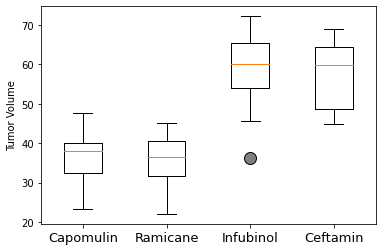

In [51]:
plt.boxplot(tumor_volume_data, labels = treatment_group, flierprops ={"marker": "o", "markersize": 12, "markerfacecolor": "grey", "markeredgecolor" : "black"})
plt.xticks(fontsize=13)
plt.ylabel("Tumor Volume")
plt.show()